<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-libraries" data-toc-modified-id="Importing-libraries-1">Importing libraries</a></span></li><li><span><a href="#Numpy-Vectorisation-and-Broadcasting" data-toc-modified-id="Numpy-Vectorisation-and-Broadcasting-2">Numpy Vectorisation and Broadcasting</a></span><ul class="toc-item"><li><span><a href="#Matrix-Multiplication" data-toc-modified-id="Matrix-Multiplication-2.1">Matrix Multiplication</a></span><ul class="toc-item"><li><span><a href="#Using-for-loops" data-toc-modified-id="Using-for-loops-2.1.1">Using for loops</a></span></li></ul></li><li><span><a href="#Element-Wise-Ops" data-toc-modified-id="Element-Wise-Ops-2.2">Element Wise Ops</a></span><ul class="toc-item"><li><span><a href="#Element-wise-matmul" data-toc-modified-id="Element-wise-matmul-2.2.1">Element wise matmul</a></span></li></ul></li><li><span><a href="#Broadcasting" data-toc-modified-id="Broadcasting-2.3">Broadcasting</a></span><ul class="toc-item"><li><span><a href="#Broadcasting-with-scaler" data-toc-modified-id="Broadcasting-with-scaler-2.3.1">Broadcasting with scaler</a></span></li><li><span><a href="#Broadcasting-with-vector" data-toc-modified-id="Broadcasting-with-vector-2.3.2">Broadcasting with vector</a></span></li><li><span><a href="#Matmul-with-broadcasting" data-toc-modified-id="Matmul-with-broadcasting-2.3.3">Matmul with broadcasting</a></span></li></ul></li></ul></li><li><span><a href="#Gradient-Descent" data-toc-modified-id="Gradient-Descent-3">Gradient Descent</a></span><ul class="toc-item"><li><span><a href="#Stepping-with-a-learning-rate" data-toc-modified-id="Stepping-with-a-learning-rate-3.1">Stepping with a learning rate</a></span></li></ul></li><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-4">Linear Regression</a></span><ul class="toc-item"><li><span><a href="#Loading-and-splitting-the-the-dataset" data-toc-modified-id="Loading-and-splitting-the-the-dataset-4.1">Loading and splitting the the dataset</a></span></li><li><span><a href="#Split-into-Train-and-Test" data-toc-modified-id="Split-into-Train-and-Test-4.2">Split into Train and Test</a></span></li><li><span><a href="#Adding-ones-for-bias" data-toc-modified-id="Adding-ones-for-bias-4.3">Adding ones for bias</a></span></li><li><span><a href="#Feature-Normalization" data-toc-modified-id="Feature-Normalization-4.4">Feature Normalization</a></span></li><li><span><a href="#Calculate-the-loss" data-toc-modified-id="Calculate-the-loss-4.5">Calculate the loss</a></span></li><li><span><a href="#Square-Loss-Gradient" data-toc-modified-id="Square-Loss-Gradient-4.6">Square Loss Gradient</a></span></li><li><span><a href="#Gradient-Checker" data-toc-modified-id="Gradient-Checker-4.7">Gradient Checker</a></span></li><li><span><a href="#Batch-Gradient-Descent" data-toc-modified-id="Batch-Gradient-Descent-4.8">Batch Gradient Descent</a></span></li></ul></li><li><span><a href="#Ridge-Regression" data-toc-modified-id="Ridge-Regression-5">Ridge Regression</a></span><ul class="toc-item"><li><span><a href="#Choose-optimum-B" data-toc-modified-id="Choose-optimum-B-5.1">Choose optimum B</a></span></li><li><span><a href="#Choose-optimum-Lambda" data-toc-modified-id="Choose-optimum-Lambda-5.2">Choose optimum Lambda</a></span></li><li><span><a href="#Stochastic-Gradeint-Descent" data-toc-modified-id="Stochastic-Gradeint-Descent-5.3">Stochastic Gradeint Descent</a></span></li></ul></li></ul></div>

## Importing libraries

In [3]:
import pandas as pd
import numpy as np

import sys

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import warnings

In [4]:
warnings.filterwarnings('ignore')

## Numpy Vectorisation and Broadcasting 

Ref: https://github.com/fastai/course-v3/blob/master/nbs/dl2/01_matmul.ipynb

### Matrix Multiplication

In [5]:
m1 = np.random.randint(100,size=(100,20))
m2 = np.random.randint(100,size=(20,50))
m1.shape,m2.shape

((100, 20), (20, 50))

<img src="Matrix_multiplication_diagram.svg.png" width=300 height=300 />

#### Using for loops

In [6]:
def matmul(a,b):
    ar,ac = a.shape # n_rows * n_cols
    br,bc = b.shape
    assert ac==br
    c = np.zeros((ar, bc))
    for i in range(ar):
        for j in range(bc):
            for k in range(ac): # or br
                c[i,j] += a[i,k] * b[k,j]
    return c

In [7]:
%time mr=matmul(m1, m2)

CPU times: user 183 ms, sys: 5.14 ms, total: 188 ms
Wall time: 189 ms


In [8]:
m1.shape, m2.shape, mr.shape

((100, 20), (20, 50), (100, 50))

### Element Wise Ops

Operators (+,-,*,/,>,<,==) are usually element-wise.

In [9]:
a = np.array([10., 6, -4])
b = np.array([2., 8, 7])
a,b

(array([10.,  6., -4.]), array([2., 8., 7.]))

In [10]:
a + b

array([12., 14.,  3.])

In [11]:
(a > b)

array([ True, False, False])

In [12]:
a*b

array([ 20.,  48., -28.])

In [10]:
(a*b).sum()

40.0

#### Element wise matmul

In [11]:
def matmul(a,b):
    ar,ac = a.shape
    br,bc = b.shape
    assert ac==br
    c = np.zeros((ar, bc))
    for i in range(ar):
        for j in range(bc):
#             for k in range(ac): # or br
#                 c[i,j] += a[i,k] * b[k,j]
            c[i,j] = (a[i,:] * b[:,j]).sum()
    return c

In [20]:
m1

array([[59, 98, 39, ..., 41, 51, 55],
       [ 3, 63, 49, ..., 71, 61, 45],
       [86, 15, 43, ..., 41, 86, 54],
       ...,
       [49, 37, 51, ..., 95, 69,  1],
       [76, 79, 88, ..., 46, 68, 13],
       [77, 87,  6, ..., 24, 47, 62]])

In [22]:
m1[1:5,:]

array([[ 3, 63, 49, 53, 59, 91, 48, 53, 60, 75, 26, 43, 85, 14, 15, 67,
        40, 71, 61, 45],
       [86, 15, 43, 43, 23, 74, 29, 36, 28, 31, 77, 51, 37, 88, 56, 27,
        48, 41, 86, 54],
       [95, 62, 51, 28, 50, 37, 48, 20, 79, 54, 27, 75,  2, 29, 18, 27,
        80, 97,  0, 54],
       [ 1, 41,  9, 79, 60, 33,  8, 58, 12, 19, 96, 89, 19, 72, 58, 34,
        46, 15, 20,  2]])

In [12]:
%timeit -n 10 _=matmul(m1, m2)

30.2 ms ± 1.36 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [13]:
100/30

3.3333333333333335

### Broadcasting

The term broadcasting describes how arrays with different shapes are treated during arithmetic operations. The term broadcasting was first used by Numpy.

#### Broadcasting with scaler

In [14]:
a

array([10.,  6., -4.])

In [15]:
a > 0

array([ True,  True, False])

In [15]:
c = np.array([0, 0, 0])

In [16]:
a>c

array([ True,  True, False])

How are we able to do a > 0? 0 is being **broadcast** to have the same dimensions as a.

In [16]:
a + 1

array([11.,  7., -3.])

In [17]:
m = np.array([[1., 2, 3], [4,5,6], [7,8,9]]); m

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]])

In [18]:
m*2

array([[ 2.,  4.,  6.],
       [ 8., 10., 12.],
       [14., 16., 18.]])

#### Broadcasting with vector

In [17]:
c = np.array([10.,20,30]); c

array([10., 20., 30.])

In [20]:
m

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]])

In [ ]:
C = np.array([[10.,20,30],[10.,20,30],[10.,20,30]])

In [21]:
m+c

array([[11., 22., 33.],
       [14., 25., 36.],
       [17., 28., 39.]])

In [22]:
c+m

array([[11., 22., 33.],
       [14., 25., 36.],
       [17., 28., 39.]])

#### Matmul with broadcasting

In [23]:
def matmul(a,b):
    ar,ac = a.shape
    br,bc = b.shape
    assert ac==br
    c = np.zeros((ar, bc))
    for i in range(ar):
        c[i] = (a[i].reshape(-1,1) * b).sum(axis=0)
    return c

In [24]:
%timeit -n 10 _= matmul(m1, m2)

1.2 ms ± 143 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [18]:
104/1.

104.0

###### Broadcasting Rules

When operating on two arrays/tensors, Numpy/PyTorch compares their shapes element-wise. It starts with the trailing dimensions, and works its way forward. Two dimensions are compatible when

- they are equal, or
- one of them is 1, in which case that dimension is broadcasted to make it the same size

Arrays do not need to have the same number of dimensions. For example, if you have a 256*256*3 array of RGB values, and you want to scale each color in the image by a different value, you can multiply the image by a one-dimensional array with 3 values. Lining up the sizes of the trailing axes of these arrays according to the broadcast rules, shows that they are compatible:

```Image  (3d array): 256 x 256 x 3 
 Scale  (1d array):             3
 Result (3d array): 256 x 256 x 3 ```

## Gradient Descent

Ref: https://github.com/fastai/fastbook/blob/master/04_mnist_basics.ipynb

In [26]:
def f(x): return x**2

Here is a graph of that function:

In [27]:
def plot_function(f,xl,yl):
    x = np.arange(-2,2.1,0.1)
    y = f(x)
    plt.plot(x,y)
    plt.xlabel(xl)
    plt.ylabel(yl)
    return None

The sequence of steps we described above starts by picking some random value for a parameter, and calculating the value of the loss:

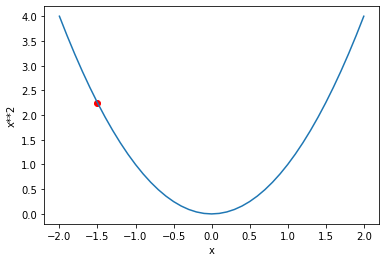

In [28]:
plot_function(f, 'x', 'x**2')
plt.scatter(-1.5, f(-1.5), color='red');

Now we look to see what would happen if we increased or decreased our parameter by a little bit — the *adjustment*. This is simply the slope at a particular point:

<img alt="A graph showing the squared function with the slope at one point" width="400" src="grad_illustration.svg"/>

We can change our weight by a little in the direction of the slope, calculate our loss and adjustment again, and repeat this a few times. Eventually, we will get to the lowest point on our curve:

<img alt="An illustration of gradient descent" width="400" src="chapter2_perfect.svg"/>

### Stepping with a learning rate

- Deciding how to change our parameters based on the value of the gradients is an important part of process. Nearly all approaches start with the basic idea of multiplying the gradient by some small number, called the *learning rate* (LR). 
- The learning rate is often a number between 0.001 and 0.1, although it could be anything. Often, people select a learning rate just by trying a few, and finding which results in the best model after training 
- Once you've picked a learning rate, you can adjust your parameters using this simple function:

```
w -= gradient(w) * lr
```

If you pick a learning rate that's too low, it can mean having to do a lot of steps.

<img alt="An illustration of gradient descent with a LR too low" width="400" caption="Gradient descent with low LR" src="chapter2_small.svg" id="descent_small"/>

Although picking a learning rate that's too high is even worse--it can actually result in the loss getting *worse*

<img alt="An illustration of gradient descent with a LR too high" width="400" caption="Gradient descent with high LR" src="chapter2_div.svg" id="descent_div"/>

If the learning rate is too high, it may also "bounce" around, rather than actually diverging; 

<img alt="An illustation of gradient descent with a bouncy LR" width="400" caption="Gradient descent with bouncy LR" src="chapter2_bouncy.svg" id="descent_bouncy"/>

Now let's apply all of this on an end-to-end example.

## Linear Regression

Ref: https://bloomberg.github.io/foml/#assignment-homework-1

In linear regression, we consider the hypothesis space of linear functions

$h_θ : R_d → R$, where $h_θ(x) = θ^T x$,

for $θ, x ∈ R_d$, and we choose θ that minimizes the following “square loss” objective function:

$J(\theta) = \frac{1}{m}\sum_1^m (h_{\theta}(x_i) - y_i)^2$

where $(x_1, y_1), . . . , (x_m, y_m) ∈ R_d × R$ is our training data.

While this formulation of linear regression is very convenient, it’s more standard to use a hypothesis space of “affine” functions:

$h_{\theta,b(x)} = θ^T x + b $
    
which allows a “bias” or nonzero intercept term.

The standard way to achieve this, while still maintaining the convenience of the first representation, is to add an extra dimension to x that is always a fixed value, such as 1.

We’ll assume this representation, and thus we’ll actually take $θ, x ∈ R_d+1$.

<img src="linear_regression.png" width=500 height=400 />

### Loading and splitting the the dataset

In [23]:
df = pd.read_csv('data.csv', delimiter=',')

In [24]:
df.shape

(200, 49)

In [27]:
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x39,x40,x41,x42,x43,x44,x45,x46,x47,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.951051,-0.951051,-4.755257,-0.866019,-0.866019,-4.330093,-0.781824,-0.781824,-3.909121,-1.376575
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.948871,-0.948871,-4.744353,-0.863095,-0.863095,-4.315474,-0.778705,-0.778705,-3.893525,0.878782
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.948056,-0.948056,-4.740279,-0.862011,-0.862011,-4.310053,-0.777551,-0.777551,-3.887757,1.108701
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.941999,-0.941999,-4.709996,-0.854081,-0.854081,-4.270406,-0.769161,-0.769161,-3.845805,0.519229
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.939440,-0.939440,-4.697202,-0.850794,-0.850794,-4.253972,-0.765706,-0.765706,-3.828531,0.772872


In [28]:
X = df.values[:,:-1]
y = df.values[:,-1]

### Split into Train and Test

In [32]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size =100, random_state=10)

In [33]:
X_train[0]

array([ 1.        ,  1.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.3455984 ,  0.3455984 ,
        1.72799201,  0.26157852,  0.26157852,  1.30789259,  0.21014752,
        0.21014752,  1.05073758,  0.17552419,  0.17552419,  0.87762096,
        0.15065692,  0.15065692,  0.7532846 , -0.9854623 , -0.9854623 ,
       -4.92731149, -0.9651822 , -0.9651822 , -4.825911  , -0.86487998,
       -0.86487998, -4.32439988, -0.76481837, -0.76481837, -3.82409183,
       -0.67897469, -0.67897469, -3.39487344])

### Adding ones for bias

In [34]:
X_train.shape

(100, 48)

In [31]:
X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1)))) 
X_val = np.hstack((X_val, np.ones((X_val.shape[0], 1))))

In [36]:
X_train.shape, X_val.shape

((100, 49), (100, 49))

In [37]:
X_train[0]

array([ 1.        ,  1.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.3455984 ,  0.3455984 ,
        1.72799201,  0.26157852,  0.26157852,  1.30789259,  0.21014752,
        0.21014752,  1.05073758,  0.17552419,  0.17552419,  0.87762096,
        0.15065692,  0.15065692,  0.7532846 , -0.9854623 , -0.9854623 ,
       -4.92731149, -0.9651822 , -0.9651822 , -4.825911  , -0.86487998,
       -0.86487998, -4.32439988, -0.76481837, -0.76481837, -3.82409183,
       -0.67897469, -0.67897469, -3.39487344,  1.        ])

### Feature Normalization

- When feature values differ greatly, we can get much slower rates of convergence of gradient-based algorithms.
- Furthermore, when we start using regularization,features with larger values are treated as “more important”, which is not usually what you want. 
- One common approach to feature normalization is perform an affine transformation (i.e. shift and rescale) on each feature so that all feature values in the training set are in [0, 1]. Each feature gets its own transformation. 
- We then apply the same transformations to each feature on the test1 set.
- It’s important that the transformation is “learned” on the training set, and then applied to the test set. 
- It is possible that some transformed test set values will lie outside the [0, 1] interval


In [35]:
def feature_normalization(train, test):
    mi = train[:,:-1].min(axis=0, keepdims=True)
    mx = train[:,:-1].max(axis=0, keepdims=True)
    
    train[:,:-1] = (train[:,:-1] - mi)/(mx-mi)
    
    test[:,:-1] = (test[:,:-1] - mi)/(mx-mi)
    
    return train, test

In [36]:
train_norm,val_norm = feature_normalization(X_train,X_val)

In [37]:
train_norm.max(), val_norm.max()

(1.0, 1.0076981096115134)

### Calculate the loss

$J(\theta) = \frac{1}{m}\sum_1^m (h_{\theta}(x_i) - y_i)^2$

$h_{\theta,b(x)} = θ^T x$

$J(\theta) = \frac{1}{m}\sum_1^m(\theta^T X_i - y_i)^2$

In [39]:
theta = np.zeros((1, train_norm.shape[1]))

In [40]:
train_norm.shape, y_train.shape, theta.shape

((100, 48), (100,), (1, 48))

Matrix and vector muliplication

<img src="matvec1_img.png" width=400 height=300 />

In [41]:
htheta = train_norm@theta.T
err = (htheta - y_train.reshape(train_norm.shape[0],1))

In [42]:
err.shape

(100, 1)

Vector multiplication to avoid sum

<img src="vectorMult.gif" width=500 height=400 />

In [45]:
err.T.dot(err)/train_norm.shape[0]

array([[7.96151834]])

In [46]:
def compute_square_loss(X, y, theta):
    n = X.shape[0]
    htheta = X@theta.T
    err = (htheta - y.reshape(n,1))
    J = err.T.dot(err)/n
    return J[0][0]

In [47]:
compute_square_loss(train_norm,y_train,theta)

7.961518343622415

### Square Loss Gradient

$J(\theta) = \frac{1}{m}\sum_1^m (h_{\theta}(x_i) - y_i)^2$

$h_{\theta,b(x)} = θ^T x$

$J(\theta) = \frac{1}{m}\sum_1^m(\theta^T X_i - y_i)^2$

$\Delta J = 2*\frac{1}{m}\sum_1^m(\theta^T X_i-y_i)X_i$

In [45]:
err.shape, train_norm.shape

((100, 1), (100, 48))

In [48]:
def compute_square_loss_gradient(X, y, theta):
    n = X.shape[0]
    
    htheta = X@theta.T
    
    err = (htheta - y.reshape(n,1))
    
    grad = (err.T@X)*(2/n)
    return grad

In [46]:
theta.shape

(1, 48)

In [49]:
err.shape, train_norm.shape

((100, 1), (100, 49))

In [50]:
grad = compute_square_loss_gradient(train_norm, y_train, theta)

In [51]:
grad

array([[ 0.25182065, -0.15015092, -0.40509526, -0.48635482, -0.09047498,
        -0.14102752, -0.19706508, -0.19706508, -0.43171119, -0.64257159,
        -0.69600073, -0.37699938, -0.00881756,  0.1961221 , -0.61472345,
        -0.71499271, -0.57656883, -0.11765843, -0.16572975, -0.16572975,
        -0.16572975, -0.2405182 , -0.2405182 , -0.2405182 , -0.25532376,
        -0.25532376, -0.25532376, -0.26195435, -0.26195435, -0.26195435,
        -0.2655612 , -0.2655612 , -0.2655612 , -0.29115783, -0.29115783,
        -0.29115783, -0.32684613, -0.32684613, -0.32684613, -0.30492033,
        -0.30492033, -0.30492033, -0.29459583, -0.29459583, -0.29459583,
        -0.28881282, -0.28881282, -0.28881282,  0.36972349]])

### Gradient Checker

- For many optimization problems, coding up the gradient correctly can be tricky.
- Luckily, there is a nice way to numerically check the gradient calculation. 
- If $J : R^d \rightarrow R$ is differentiable, then for any vector $h ∈ R^d$, the directional derivative of J at θ in the direction h is given by

$$\lim_{\epsilon \to 0} \frac{J(θ+ \epsilon h)−J(θ−\epsilon h)}{2\epsilon}$$
    

- We can approximate this directional derivative by choosing a small value of ε > 0 and evaluating the quotient above. - We can get an approximation to the gradient by approximating the directional derivatives in each coordinate direction and putting them together into a vector. 
- In other words, take h = (1,0,0,...,0) to get the first component of the gradient. Then take h = (0,1,0,...,0) to get the second component

In [52]:
def generic_gradient_checker(X, y, theta, objective_func, gradient_func, epsilon=0.01, tolerance=1e-4):

    true_gradient = gradient_func(X, y, theta) #the true gradient
    num_features = theta.shape[1]
    approx_grad = np.zeros((1,num_features)) #Initialize the gradient we approximate
    
    h = np.zeros((1, num_features))
    
    for i in range(num_features):
        h[0,i] = 1
        jplus = objective_func(X,y, theta + h*epsilon)
        jminus = objective_func(X,y, theta- h*epsilon)
        approx_grad[0,i] = (jplus - jminus)/(2*epsilon)
        h = np.zeros((1,num_features))
    
    diff = sum((approx_grad[0]-true_gradient[0])**2)
    if diff < tolerance:
        return True
    else:
        return False
    

In [53]:
generic_gradient_checker(train_norm, y_train, theta, compute_square_loss, compute_square_loss_gradient)

True

### Batch Gradient Descent

In [54]:
def batch_grad_descent(X, y,X_val, Y_val, alpha=0.1, num_iter=1000, check_gradient=False):

    num_instances, num_features = X.shape[0], X.shape[1]
    theta_hist = np.zeros((num_iter+1,1, num_features))  #Initialize theta_hist
    loss_hist = np.zeros(num_iter+1) #initialize loss_hist
    loss_hist_val = np.zeros(num_iter+1)
    
    theta = np.zeros((1,num_features)) #initialize theta
    
    
    for i in range(num_iter):
        if check_gradient:
            flag = generic_gradient_checker(X,y,theta_hist[i],compute_square_loss, compute_square_loss_gradient)
            if not flag:
                print('gradient check failed')
        
        
        theta_hist[i] = theta
        loss_hist[i] = compute_square_loss(X,y, theta_hist[i])
        loss_hist_val[i] = compute_square_loss(X_val,Y_val, theta_hist[i])
        
        tgrad = compute_square_loss_gradient(X,y,theta_hist[i])
        
        theta = theta - alpha*tgrad
    
    theta_hist[num_iter] = theta
    loss_hist[num_iter] = compute_square_loss(X,y, theta_hist[num_iter])
    loss_hist_val[num_iter] = compute_square_loss(X_val,Y_val, theta_hist[num_iter])
    
    
    return theta_hist, loss_hist, loss_hist_val
        

In [55]:
num_iter = 1000

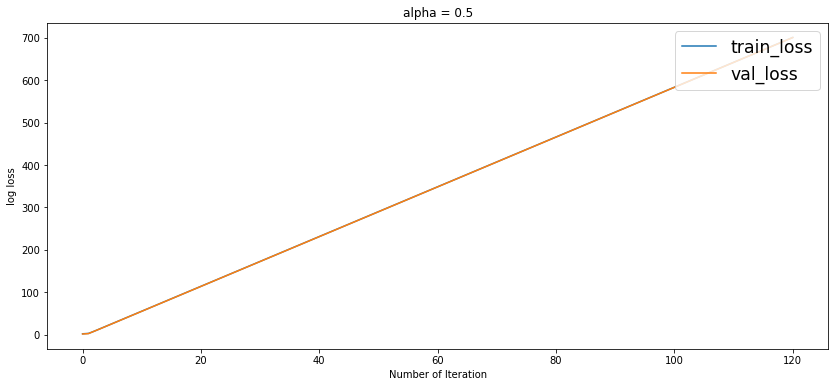

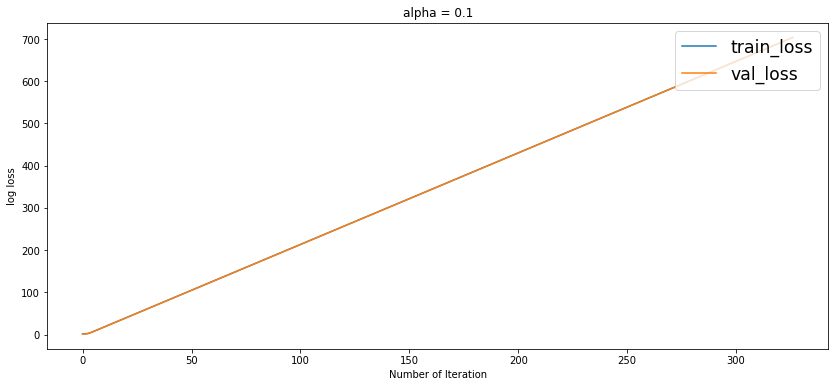

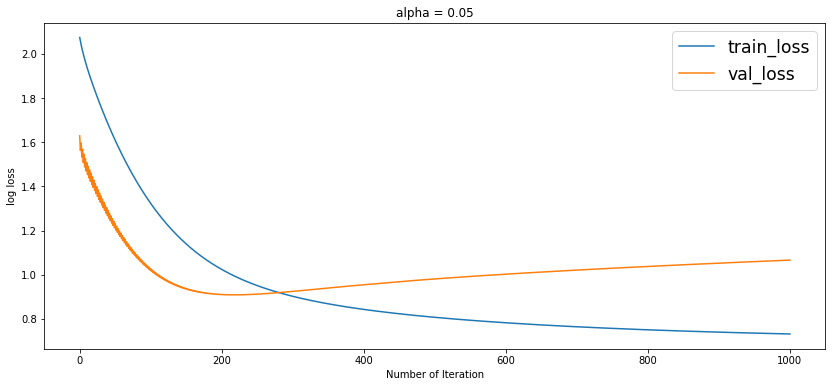

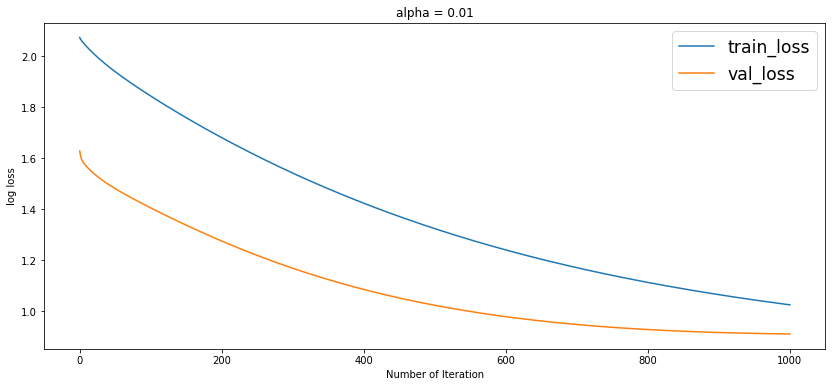

In [56]:
alphas = [0.5,0.1,0.05,0.01]
for alpha in alphas:
    theta_hist, loss_hist, loss_hist_val = batch_grad_descent(train_norm,y_train,\
                                        val_norm,y_val,alpha=alpha,num_iter=num_iter)
    plt.figure(figsize=(14,6))
    plt.xlabel('Number of Iteration')
    plt.ylabel('log loss')
    plt.title('alpha = {0}'.format(alpha))
    plt.plot(range(num_iter+1),np.log(loss_hist), label ='train_loss'); 
    plt.plot(range(num_iter+1),np.log(loss_hist_val),label ='val_loss')
    plt.legend(fontsize='xx-large',loc=1)

## Ridge Regression

- When we have a large number of features compared to instances, regularization can help control overfitting. 
- Ridge regression is linear regression with $l_2$ regularization. 
- The regularization term is sometimes called a penalty term. The objective function for ridge regression is

$$J(\theta) = \frac{1}{m}\sum_{i=1}^{m} (h_\theta(x_i) -y_i)^2 + \lambda \theta^T\theta$$,

where λ is the regularization parameter, which controls the degree of regularization. 

Note that the bias parameter is being regularized as well. We will address that below.

In [57]:
def compute_regularized_square_loss_gradient(X, y, theta, lambda_reg):
    n = X.shape[0]
    htheta = X@theta.T
    err = (htheta - y.reshape(n,1))
    grad = (err.T@X)*(2/(X.shape[0])) + 2*lambda_reg*theta
    return grad

In [58]:
def regularized_grad_descent(X, y,X_val, Y_val, alpha=0.05,B=1, lambda_reg=1, num_iter=1000):
    (num_instances, num_features) = X.shape
    
    theta = np.zeros((1,num_features)) 
    theta_hist = np.zeros((num_iter+1, 1,num_features))  
    loss_hist = np.zeros(num_iter+1)
    loss_hist_val = np.zeros(num_iter+1)
    
    X[:,-1]=B
    
    for i in range(num_iter):
        theta_hist[i] = theta
        
        loss_hist[i] = compute_square_loss(X,y, theta_hist[i])
        loss_hist_val[i] = compute_square_loss(X_val,Y_val, theta_hist[i])
        
        tgrad = compute_regularized_square_loss_gradient(X,y,theta_hist[i],lambda_reg)
        theta = theta - alpha*tgrad
    
    theta_hist[num_iter] = theta
    loss_hist[num_iter] = compute_square_loss(X,y, theta_hist[num_iter])
    loss_hist_val[num_iter] = compute_square_loss(X_val,Y_val, theta_hist[num_iter])
    
    return theta_hist, loss_hist,loss_hist_val

### Choose optimum B

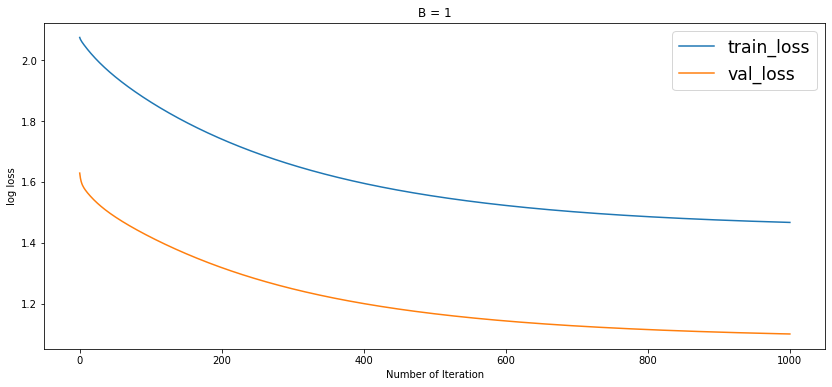

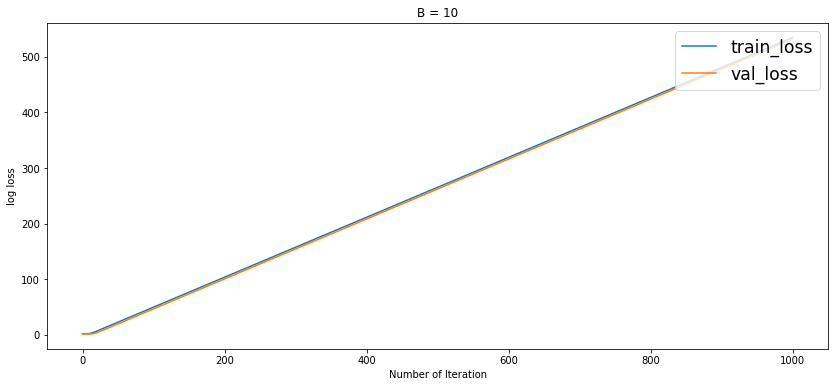

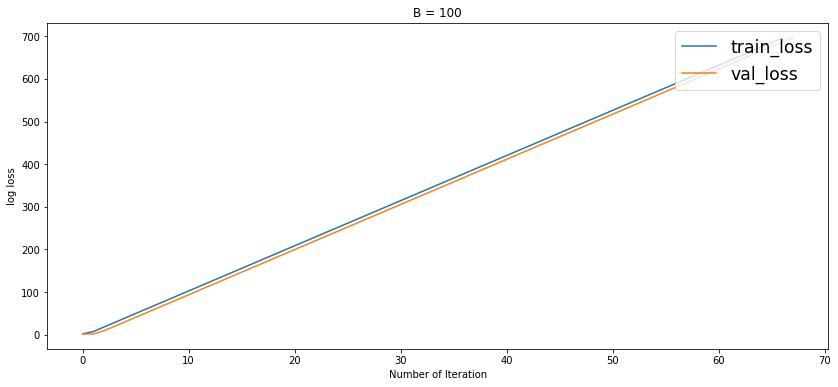

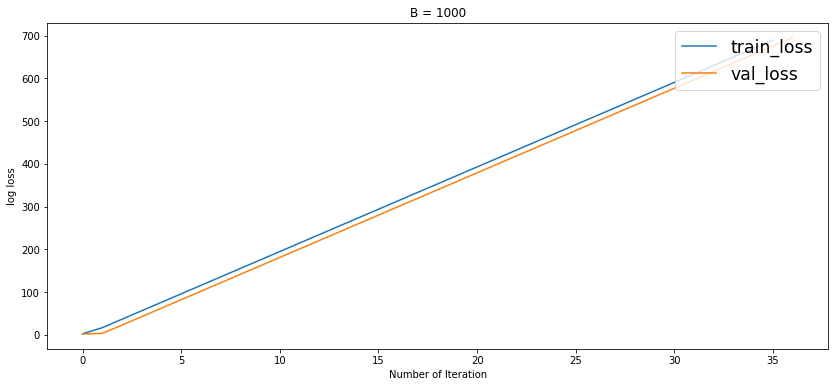

In [59]:
Bs = [1,10,100,1000]
for B in Bs:
    theta_hist, loss_hist, loss_hist_val = regularized_grad_descent(train_norm, y_train,\
                                            val_norm,y_val,lambda_reg=0.1,alpha=0.01,B=B,num_iter=num_iter)
    plt.figure(figsize=(14,6))
    plt.xlabel('Number of Iteration')
    plt.ylabel('log loss')
    plt.title('B = {0}'.format(B))
    plt.plot(range(num_iter+1),np.log(loss_hist), label ='train_loss'); 
    plt.plot(range(num_iter+1),np.log(loss_hist_val),label ='val_loss')
    plt.legend(fontsize='xx-large',loc=1)   

### Choose optimum Lambda

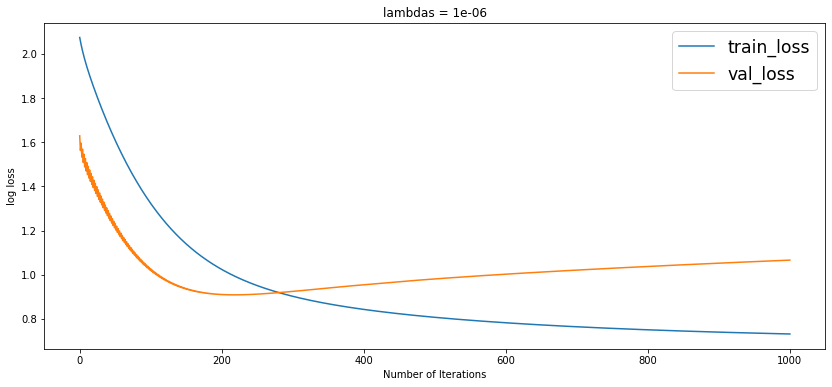

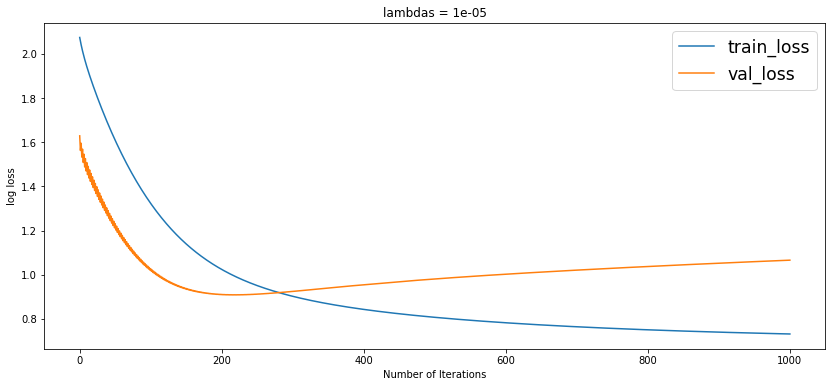

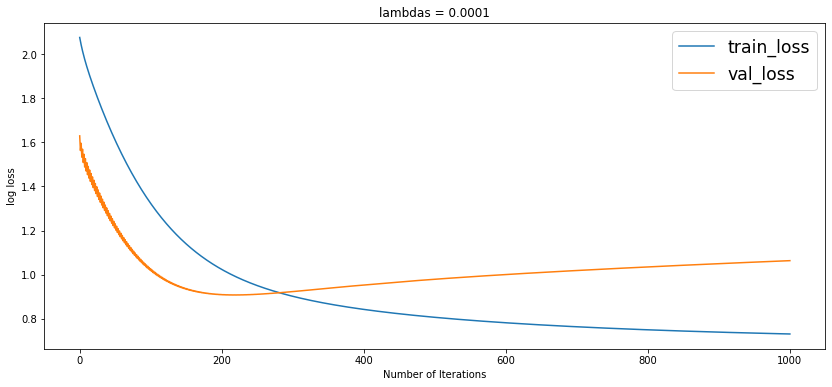

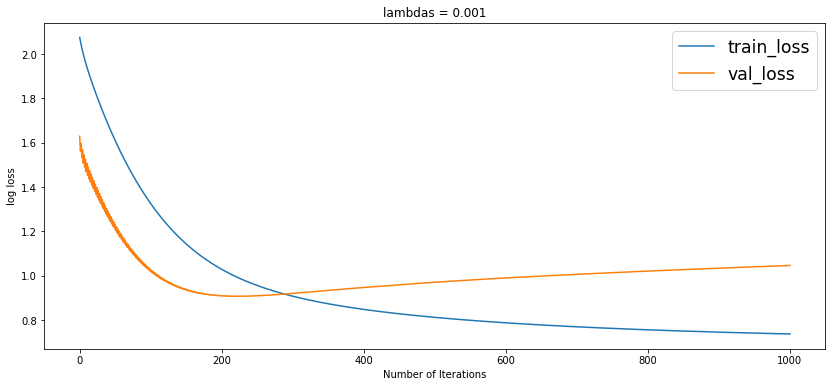

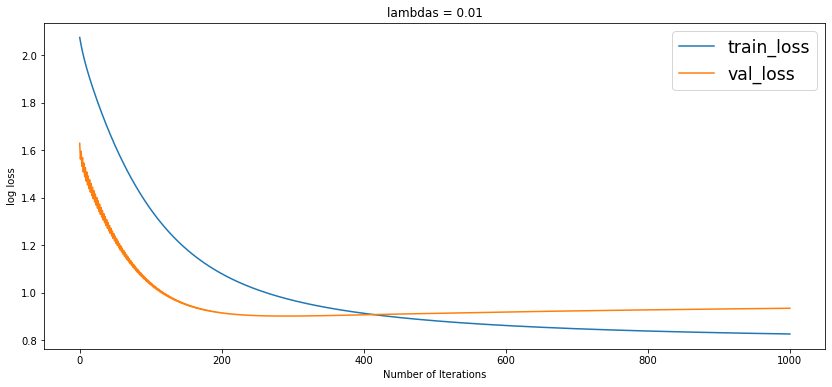

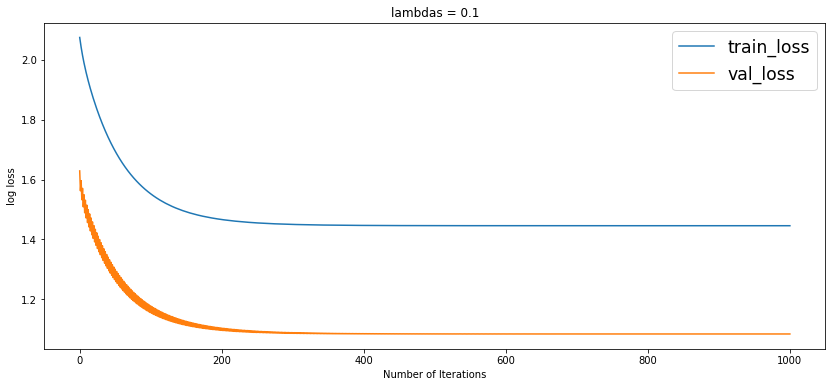

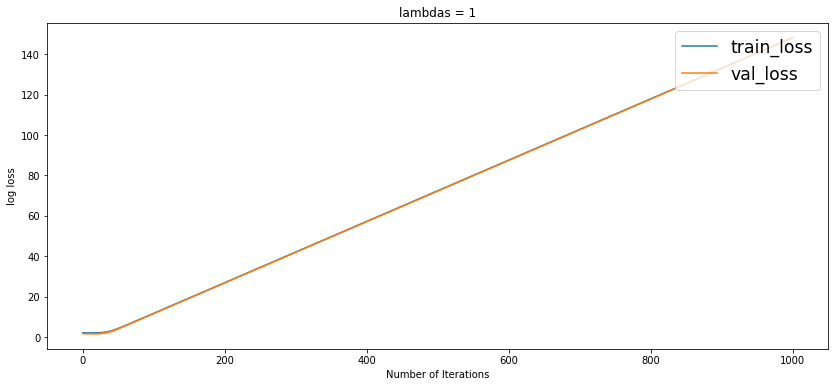

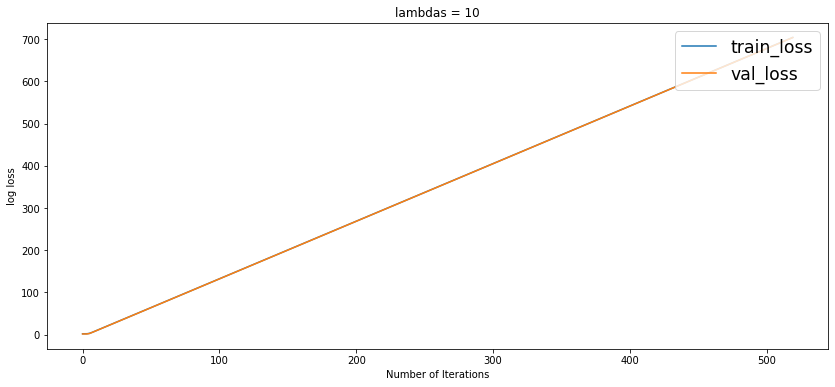

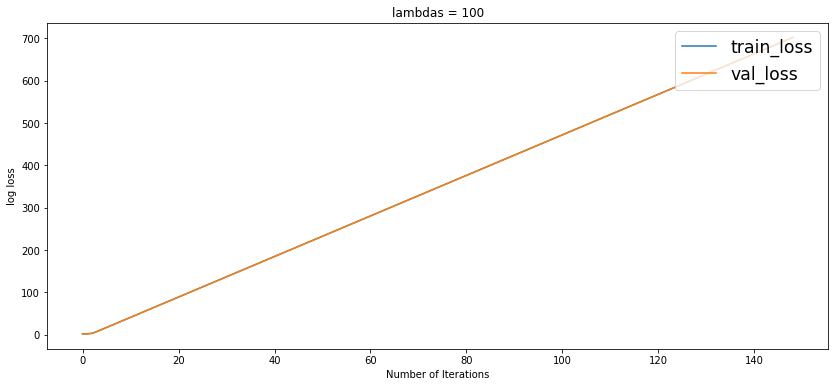

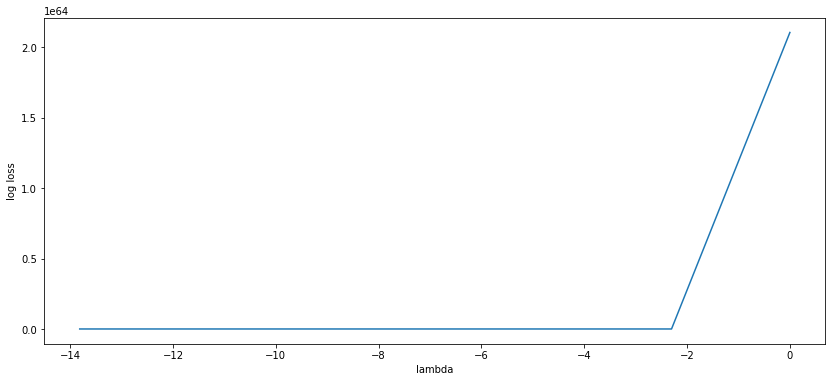

In [60]:
lambdas = [1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100]
val_loss = []
for lamb in lambdas:
    theta_hist, loss_hist, loss_hist_val = regularized_grad_descent(train_norm, y_train,\
                                            val_norm,y_val,lambda_reg=lamb,alpha=0.05,B=1,num_iter=num_iter)
    
    val_loss.append(loss_hist_val[-1])
    plt.figure(figsize=(14,6))
    plt.xlabel('Number of Iterations')
    plt.ylabel('log loss')
    plt.title('lambdas = {0}'.format(lamb))
    plt.plot(range(num_iter+1),np.log(loss_hist), label ='train_loss'); 
    plt.plot(range(num_iter+1),np.log(loss_hist_val),label ='val_loss')
    plt.legend(fontsize='xx-large',loc=1)   

plt.figure(figsize=(14,6))
plt.xlabel('lambda')
plt.ylabel('log loss')
plt.plot(np.log(lambdas),val_loss);
    

### Stochastic Gradeint Descent

- When the training data set is very large, evaluating the gradient of the objective function can take a long time, since it requires looking at each training example to take a single gradient step. 
- When the objective function takes the form of an average of many values, such as
$$J(\theta) = \frac{1}{m} \sum_{i=i}^{m} f_i(\theta)$$
(as it does in the empirical risk), stochastic gradient descent (SGD) can be very effective.

- In SGD, rather than taking −∇J(θ) as our step direction, we take $−∇f_i(θ)$ for some i chosen uniformly at random from {1, . . . , m}.
- In machine learning applications, each $f_i(θ)$ would be the loss on the ith example (and of course we’d typically write n instead of m, for the number of training points).
- In practical implementations for ML, the data points are randomly shuffled, and then we sweep through the whole training set one by one, and perform an update for each training example individually.
- One pass through the data is called an epoch.
- Note that each epoch of SGD touches as much data as a single step of batch gradient descent.
- You can use the same ordering for each epoch, though optionally you could investigate whether reshuffling after each epoch affects the convergence speed.

In [61]:
### Stochastic Gradient Descent
def stochastic_grad_descent(X, y,X_val,Y_val, alpha=0.1, lambda_reg=1, num_iter=1000):

    num_instances, num_features = X.shape[0], X.shape[1]
    theta = np.ones((1,num_features)) #Initialize theta


    theta_hist = np.zeros((num_iter, num_instances,1, num_features))  #Initialize theta_hist
    loss_hist = np.zeros((num_iter, num_instances)) #Initialize loss_hist
    
    loss_hist_val = np.zeros(num_iter)
    
    count = 0
    for i in range(num_iter):
        for j in range(num_instances):
            if type(alpha)==float:
                lr = alpha
            elif alpha == "1/t" and count>=10:
                lr = 1/(count+1)
            elif alpha == '1/sqrt(t)'and count >=1000:
                lr = 1/np.sqrt(count+1)
            else:
                lr =0.01
                
            theta_hist[i][j] = theta
            tgrad = compute_regularized_square_loss_gradient(X[j:j+1,:],y[j:j+1],theta_hist[i][j],lambda_reg)
            loss_hist[i][j] = compute_square_loss(X[j:j+1,:],y[j:j+1], theta_hist[i][j])
            
            theta = theta - lr*tgrad
            count = count+1
            
        loss_hist_val[i] = compute_square_loss(X_val,Y_val, theta_hist[i][-1])

    return theta_hist, loss_hist,loss_hist_val

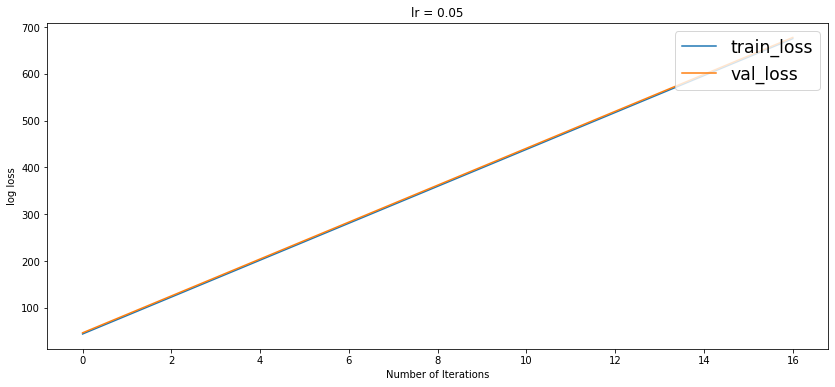

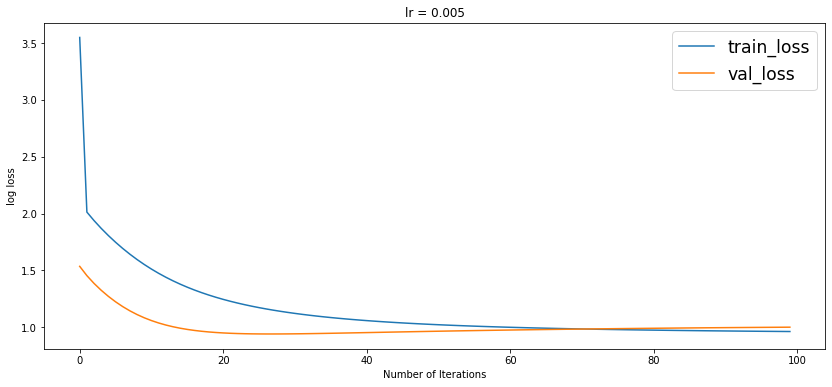

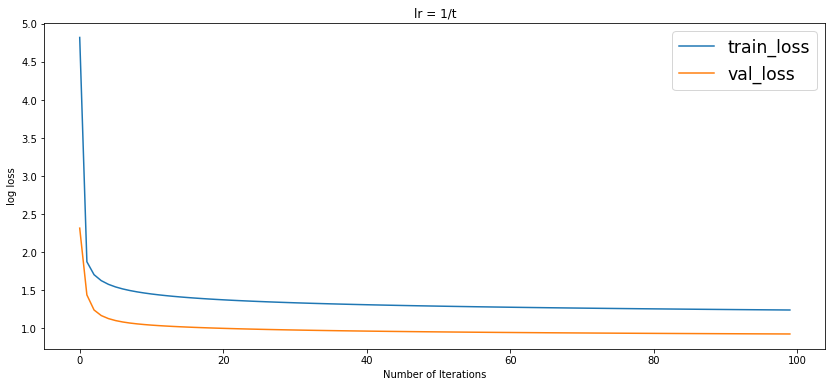

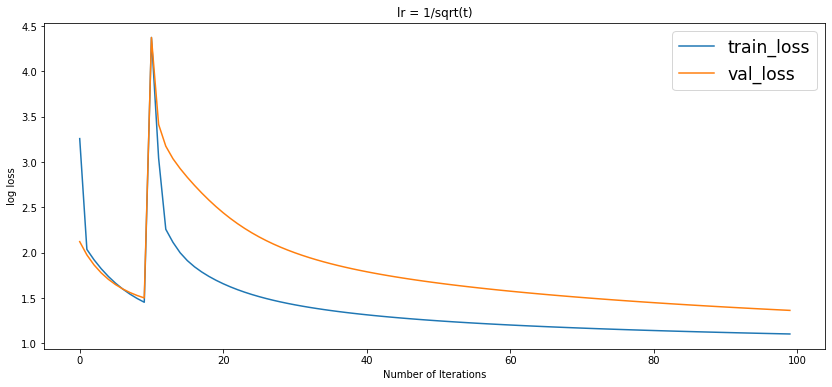

In [62]:
num_iter = 100
alphas = [0.05,0.005,'1/t','1/sqrt(t)']
for alpha in alphas:
    theta_hist, loss_hist,loss_hist_val = stochastic_grad_descent(train_norm, y_train, val_norm,y_val,\
                                                    alpha=alpha,lambda_reg=0.01,num_iter=num_iter)


    plt.figure(figsize=(14,6))
    plt.xlabel('Number of Iterations')
    plt.ylabel('log loss')
    plt.title('lr = {0}'.format(alpha))
    plt.plot(range(num_iter),np.log(np.mean(loss_hist,axis=1)), label ='train_loss')
    plt.plot(range(num_iter),np.log(loss_hist_val),label ='val_loss')
    plt.legend(fontsize='xx-large',loc=1) 